In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Heart-Disease-data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
data['ca'].value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

In [9]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
data['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [11]:
data['thal'].value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [12]:
data['fbs'].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

<Axes: >

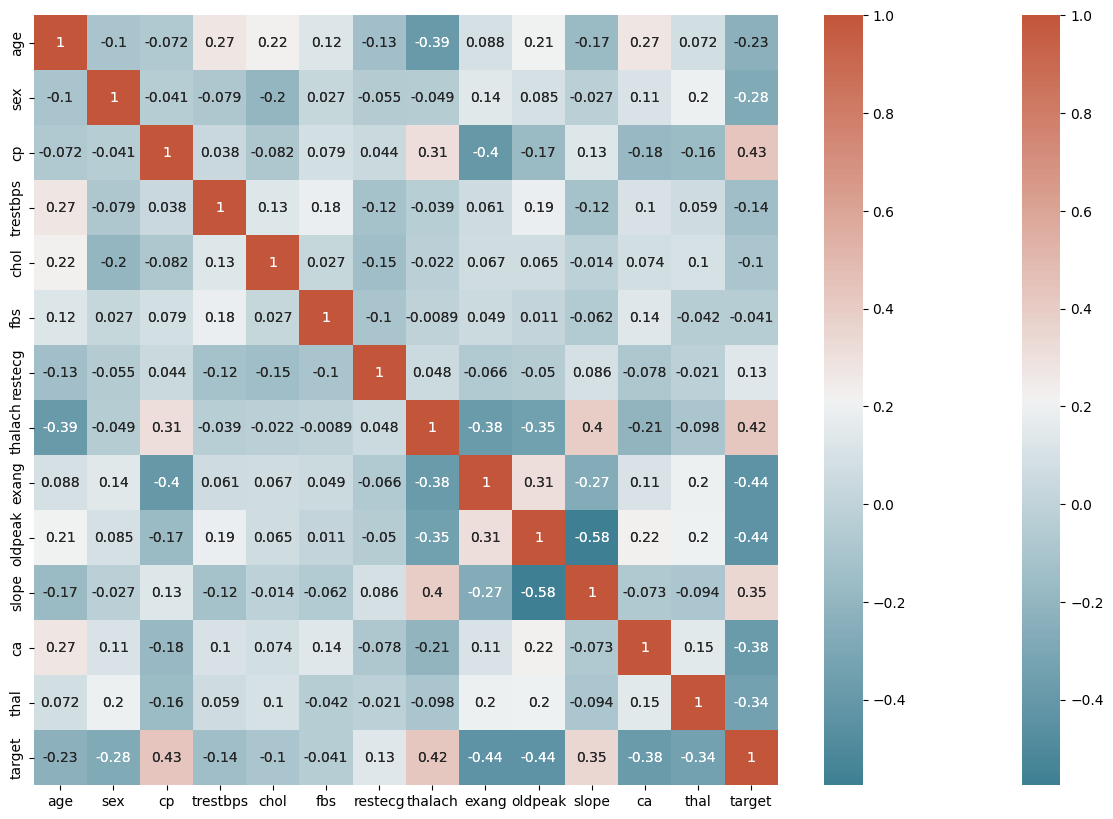

In [13]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

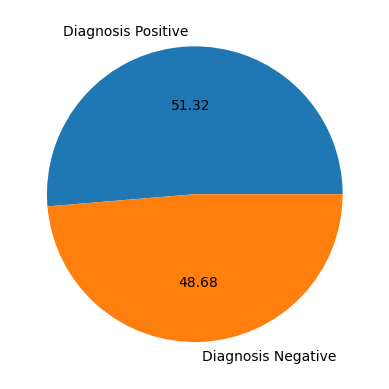

In [14]:
plt.pie(data['target'].value_counts(), labels=['Diagnosis Positive', 'Diagnosis Negative'], autopct="%0.2f")
plt.show()

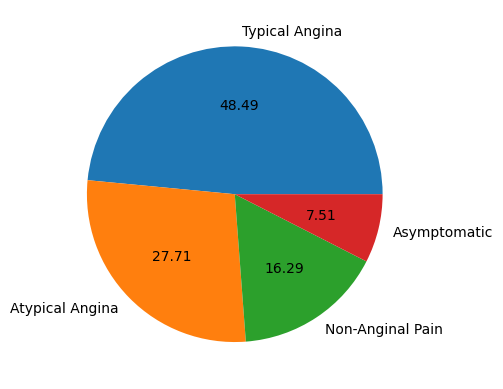

In [15]:
plt.pie(data['cp'].value_counts(), labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], autopct="%0.2f")
plt.show()

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [19]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [20]:
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print(test_data_accuracy)

0.8097560975609757


In [21]:
import pickle
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [22]:
with open('sc.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)